In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("data/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
data.shape

(200, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22c76a1fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22c76b06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22c76a1c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22c76b0d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22c76bb0a0>],
 'means': []}

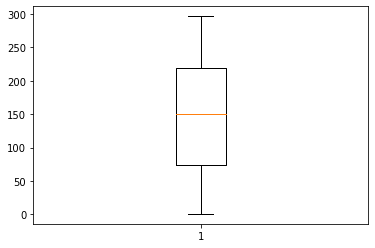

In [21]:
plt.boxplot(data['TV'])

In [ ]:
desc=data['newspaper'].describe()

In [ ]:
desc

In [ ]:
IQR=desc['75%']-desc['25%']
upper_limit=desc['75%']+1.5*IQR


In [ ]:
data['newspaper'][data['newspaper']>upper_limit]=upper_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22c7722610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22c7722cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22c77222b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22c77303d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22c77306d0>],
 'means': []}

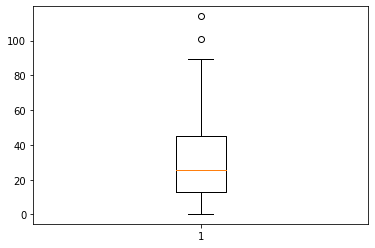

In [20]:
plt.boxplot(data['newspaper'])

In [30]:
y=data['sales']
X=data.drop('sales',axis=1)

In [31]:
X.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [12]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22c7688e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22c7695550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22c7688af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22c7695c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22c7695f10>],
 'means': []}

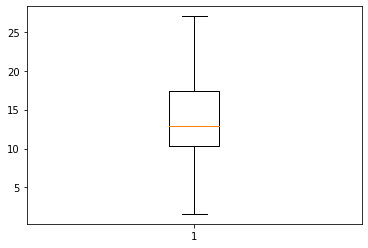

In [24]:
plt.boxplot(data.sales)

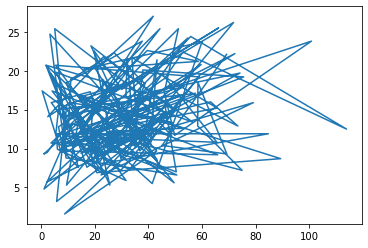

In [25]:
plt.plot(data['newspaper'],data['sales'])

In [26]:
cm=data.corr()
cm

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


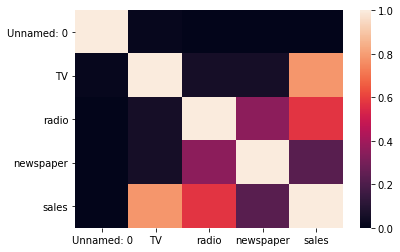

In [28]:
import seaborn as sns
sns.heatmap(cm,vmax=1,vmin=0) 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42) 

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

#fit command is used for training a model using train data.

LinearRegression()

In [34]:
reg.coef_


array([0.00076265, 0.04542933, 0.19146576, 0.00289504])

In [35]:
reg.intercept_

2.6921537539091727

In [38]:
ypred=reg.predict(X_test)  
ypred


array([16.38744409, 20.86731254, 21.56559474, 10.54088059, 22.18970426,
       13.04623435, 21.0787109 ,  7.36830505, 13.61800996, 15.08108548,
        8.89070208,  6.56218469, 14.36841551,  8.74976106,  9.65124749,
       12.1553164 ,  8.56730146, 16.28793736, 10.15712629, 18.82685441,
       19.61267327, 13.12290918, 12.28262431, 21.35987452,  7.66034978,
        5.61403015, 20.78702192, 11.87810313,  9.08396305,  8.38914076,
       12.33574712,  9.82838137, 21.40286776, 12.14374124, 18.32781855,
       20.17611868, 14.01360947, 20.93760261, 10.97248876,  4.366457  ,
        9.56413029, 12.68331032,  9.89365313,  8.00691535, 13.46681099,
        5.32540844,  9.10391408, 14.03047466,  8.74482786, 11.53639151])

In [37]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 2.9041392726757187


In [44]:
y_pred_training=reg.predict(X_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 2.765928900298277


In [39]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.9041392726757196

In [41]:
reg.score(X_train,y_train)

0.8967178221746831

In [45]:
reg.score(X_test,y_test)

0.8926247034500232

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8926247034500232

In [47]:
data=pd.read_csv("Downloads/CHRISTY/salesprice_processed.csv")

In [48]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,0,...,0,0,0,1,0,0,0,0,1,0
